In [16]:
path=  'C:/Users/felipe/Documents/Brain/'

In [17]:
import sys
sys.path.append('C:/Users/felipe/Documents/Brain/') 

In [18]:
import catboost as cb
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class CatBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="CatBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
                
        self.model_ml= cb.CatBoostRegressor
        self.params = {
            'loss_function': 'RMSE',  
            'eval_metric': 'RMSE'  
        }
        
        self.params_space = {
            'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
            'depth': Integer(3, 10),
            'n_estimators': Integer(50, 5000),
            'l2_leaf_reg': Real(1, 20)
        }

In [19]:
import pandas as pd
import numpy as np
import pickle

#save_path=f'{path}/Brain_Age/CatBoost/'
file_name = 'Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

cat_model = CatBoostRegressor()
cat_model.set_data(X,y)

cat_model.fit_params_search = {
                "early_stopping_rounds": 200
            }

In [5]:
cat_model.model_params_search = {'task_type':'GPU',
                               'devices':'0'}

# Busqueda Hiperparametros

In [ ]:
opt_cat, best_params_cat = cat_model.SearchBestModel( n_iter_=400, early_stop=True, save_result=True)


In [ ]:
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/CatBoost/Modelos/opt_CAT_model_400iter.pickle', 'wb') as file:
#        pickle.dump(opt_cat, file)

In [6]:
with open(f'{path}Opt_Model/opt_CAT_model_all_features.pickle', 'rb') as file:
    opt_cat = pickle.load(file)

In [ ]:
resultados = opt_cat.cv_results_
cat_model.guardar_resultados_busqueda(resultados=resultados)

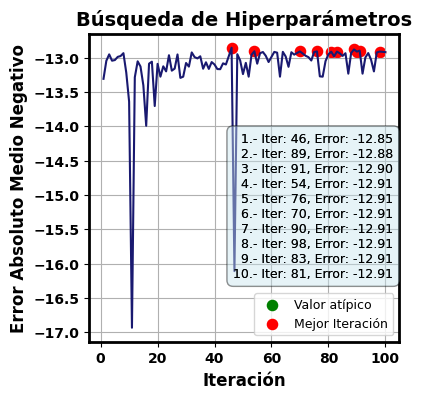

Top 1: Iteración 46, Error -12.8538497086999
Top 2: Iteración 89, Error -12.879238516540394
Top 3: Iteración 91, Error -12.896922863551248
Top 4: Iteración 54, Error -12.905353616895344
Top 5: Iteración 76, Error -12.907648256268843
Top 6: Iteración 70, Error -12.907995743820575
Top 7: Iteración 90, Error -12.909930316689886
Top 8: Iteración 98, Error -12.910098387351502
Top 9: Iteración 83, Error -12.910639807678091
Top 10: Iteración 81, Error -12.911579272750615


In [7]:
cat_model.plot_search_best_model(opt_cat, linewidth=1.5, color='midnightblue', num_max=100)

In [8]:
best_params_cat = cat_model.best_hyper(opt_cat, num_max=100)

In [9]:
best_params_cat

[{'depth': 7,
  'l2_leaf_reg': 19.646652188166914,
  'learning_rate': 0.025271369442422413,
  'n_estimators': 1107},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01856037453684189,
  'n_estimators': 1951},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.0189005155570754,
  'n_estimators': 1821},
 {'depth': 6,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2433},
 {'depth': 6,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2576},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.031340195609154624,
  'n_estimators': 1256},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2275},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2523},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.01,
  'n_estimators': 2700},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.019218724960247152,
  'n_estimators': 1333}]

# Trainer

In [ ]:
results, best_model_results, best_model = cat_model.trainer(params_=best_params_cat[0])

In [11]:
with open(f'{path}Opt_Model/BestModel_CAT_all_features.pickle', 'wb') as file:
    pickle.dump(best_model, file)
with open(f'{path}/Opt_Model/results_CAT_model_all_features.pickle', 'wb') as file:
    pickle.dump(results, file)

In [20]:
with open(f'{path}Opt_Model/BestModel_CAT_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model/results_CAT_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

In [21]:
cat_model.model=model

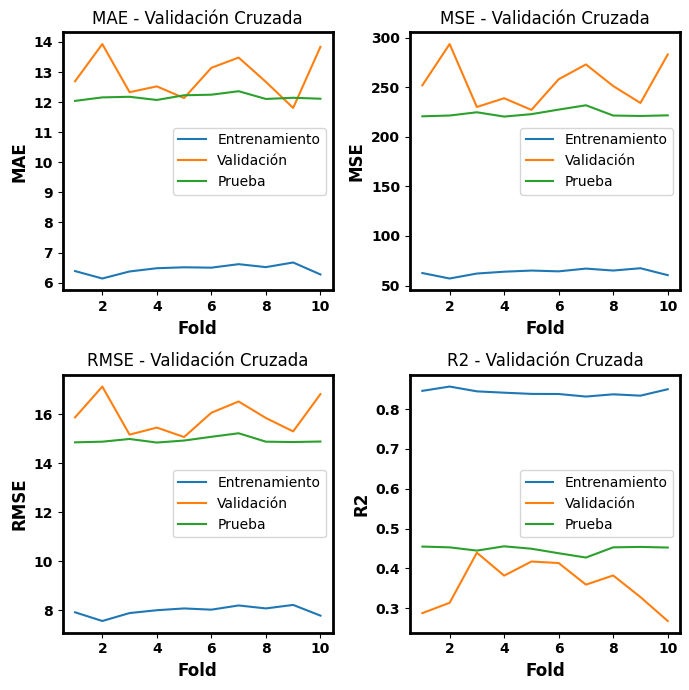

In [22]:
cat_model.plot_metricas_evaluacion(results)

In [23]:
y_pred = cat_model.predicter(X_test=cat_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     238.0
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           4.49e-39
Time:                        22:29:26   Log-Likelihood:                -998.98
No. Observations:                 276   AIC:                             2002.
Df Residuals:                     274   BIC:                             2009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1098      1.395     20.868      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


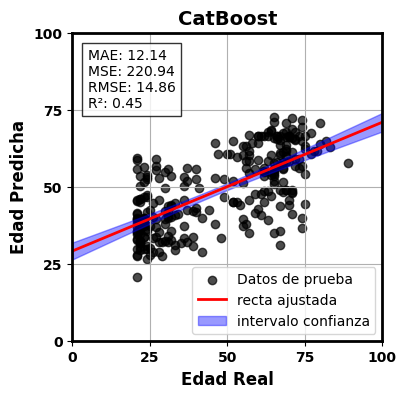

Error medio absoluto: 12.143815375160802
Error cuadrático medio: 220.94023033829777
Raíz del error cuadrático medio: 14.864058340113502
Coeficiente de determinación (R²): 0.4540740120614818


In [24]:
cat_model.plot_regresion(x= cat_model.y_test, y=y_pred,label_='Datos de prueba', x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, color='black', title='CatBoost',line_ideal=False, confidence_interval=True,  alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

Predicción en los datos de Entrenamiento

In [25]:
y_pred_train=cat_model.predicter(cat_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     5089.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:29:38   Log-Likelihood:                -3559.1
No. Observations:                1101   AIC:                             7122.
Df Residuals:                    1099   BIC:                             7132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7684      0.495     33.853      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


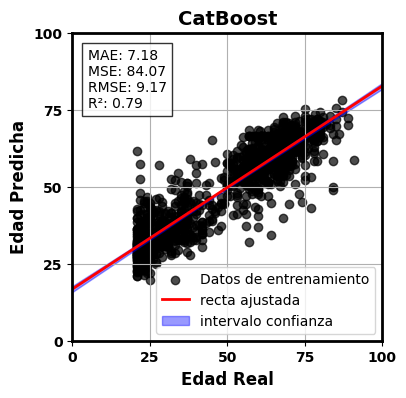

Error medio absoluto: 7.184599180736349
Error cuadrático medio: 84.0651577617806
Raíz del error cuadrático medio: 9.168705348181966
Coeficiente de determinación (R²): 0.7900568611933472


In [26]:
cat_model.plot_regresion(x=cat_model.y_train,y= y_pred_train, label_='Datos de entrenamiento',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, color='black', title='CatBoost',line_ideal=False, confidence_interval=True,  alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [27]:
residuals = cat_model.predicter(cat_model.X_train)-cat_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1357.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          4.25e-194
Time:                        22:29:44   Log-Likelihood:                -3559.1
No. Observations:                1101   AIC:                             7122.
Df Residuals:                    1099   BIC:                             7132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7684      0.495     33.853      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


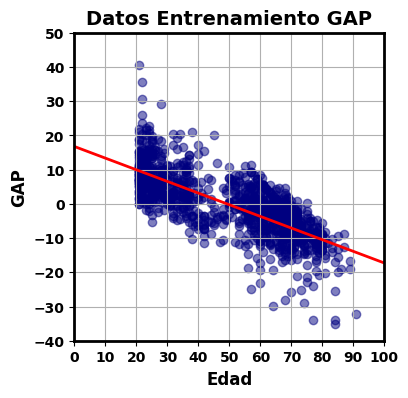

Error medio absoluto: 49.94857106615454
Error cuadrático medio: 3243.066142572314
Raíz del error cuadrático medio: 56.94792483113247
Coeficiente de determinación (R²): -7.099187623707305


In [28]:
cat_model.plot_regresion(x=cat_model.y_train,y=residuals,line_ideal=False,confidence_interval=False,x_min_limit=0,x_max_limit=100,legend=False,legend_metrics=False, title='Datos Entrenamiento GAP', xlabel='Edad', ylabel='GAP')

In [29]:
y_pred_corrected=cat_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     783.1
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           2.60e-82
Time:                        22:29:56   Log-Likelihood:                -998.98
No. Observations:                 276   AIC:                             2002.
Df Residuals:                     274   BIC:                             2009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3413      1.395      8.847      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


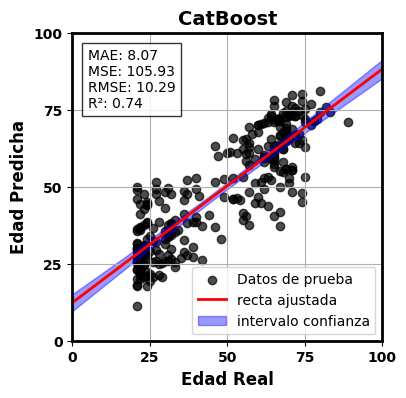

Error medio absoluto: 8.065834390008103
Error cuadrático medio: 105.92952034205253
Raíz del error cuadrático medio: 10.292206777074222
Coeficiente de determinación (R²): 0.7382564598758627


In [30]:
cat_model.plot_regresion(x= cat_model.y_test, y=y_pred_corrected,label_='Datos de prueba', x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, color='black', title='CatBoost',line_ideal=False, confidence_interval=True,  alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

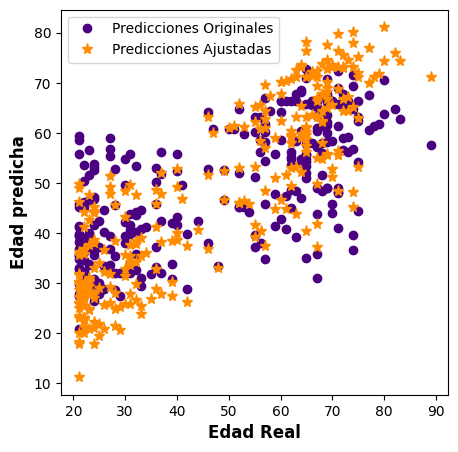

In [35]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(cat_model.y_test, y_pred, 'o', label='Predicciones Originales',color='indigo')
plt.plot(cat_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

In [39]:
y_test_array = cat_model.y_test.to_numpy()
#with open(f'{path}Brain_Age/Age_Array/edad_real_array.pickle', 'wb') as file:
#        pickle.dump(y_test_array, file)

In [40]:
with open(f'{path}Brain_Age/Age_Array/cat_edad_predicha_array.pickle', 'wb') as file:
        pickle.dump(y_pred_corrected, file)

In [23]:
shap_values, shap_sumary_sorted = cat_model.feature_importance_shap(X_test = cat_model.X_test, model = cat_model.model)

Importancia de características basada en suma de valores SHAP:
IAF_OCC_left: 566.8466120630296
Low_subj_spec_EPP_OCC_right: 495.05153720009747
IAF_OCC_right: 486.5639139552056
High_subj_spec_RPD_CING_right: 354.1585929068392
High_subj_spec_EPP_CING_right: 267.2413423960484
Low_subj_spec_EPP_CING_left: 239.04569788974425
Low_subj_spec_EPP_PARIET_right: 221.46679823242306
Low_subj_spec_RPD_OCC_left: 208.12650149040635
IAF_INS_left: 203.55489541332005
Low_subj_spec_RPD_CING_right: 193.17223634353851
Alpha2_canon_RPD_CING_right: 175.09315562379248
Low_subj_spec_RPD_HPC_left: 169.7663193861488
Low_subj_spec_EPP_PARIET_left: 158.65025073206908
Alpha2_canon_EPP_PARIET_left: 142.90130184566243
Alpha2_canon_EPP_HPC_left: 137.52057400029153
Alpha2_canon_RPD_HPC_left: 136.55387059129464
High_subj_spec_RPD_HPC_left: 133.76698236490768
High_subj_spec_RPD_CING_left: 99.7082533658277
Low_subj_spec_RPD_CING_left: 91.76807391371791
High_subj_spec_EPP_PARIET_right: 90.74171232529896
High_subj_spec_EPP_H

In [13]:
with open(f'{path}Opt_Model/shap_values_cat.pickle', 'rb') as file:
    shap_values = pickle.load(file)

with open(f'{path}Opt_Model/shap_summary_sorted_cat.pickle', 'rb') as file:
    shap_sumary_sorted = pickle.load(file)

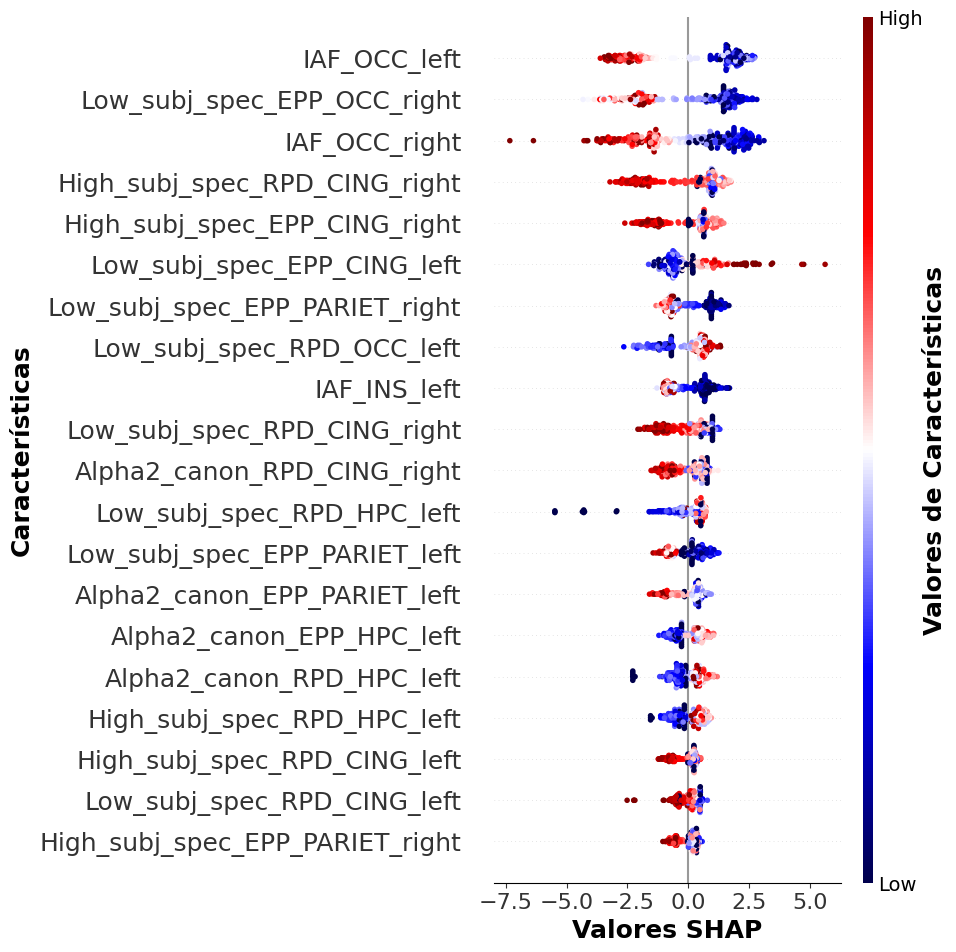

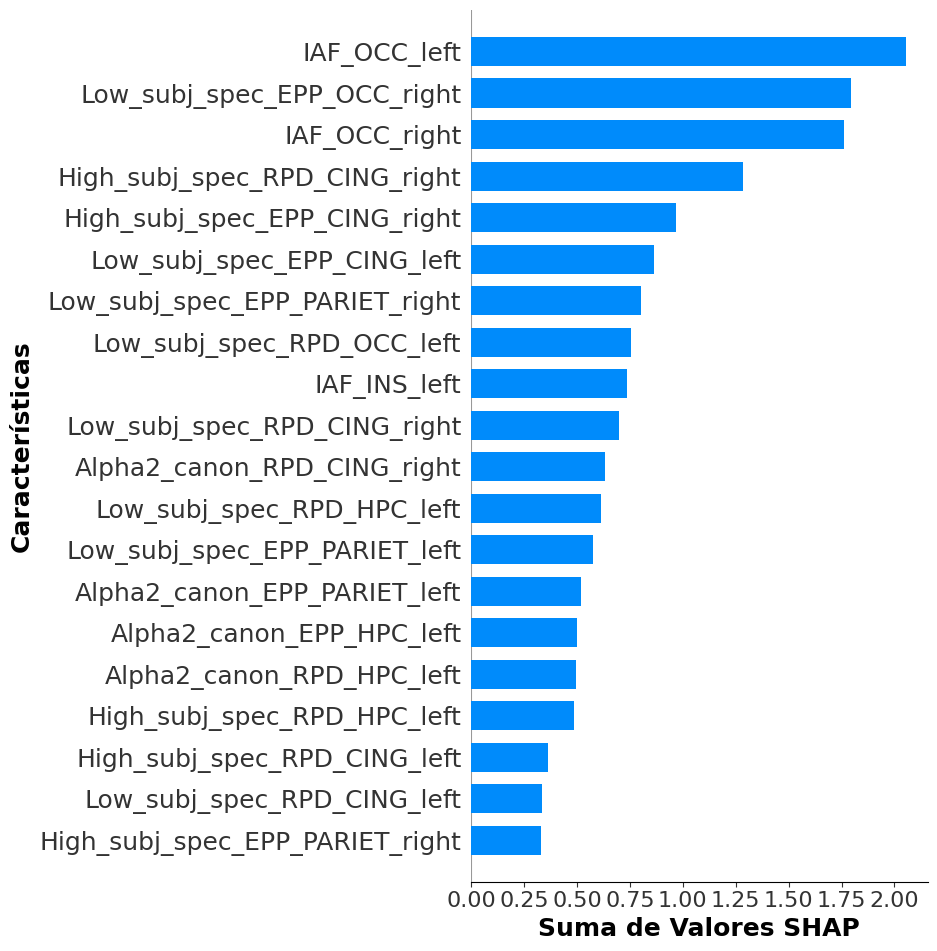

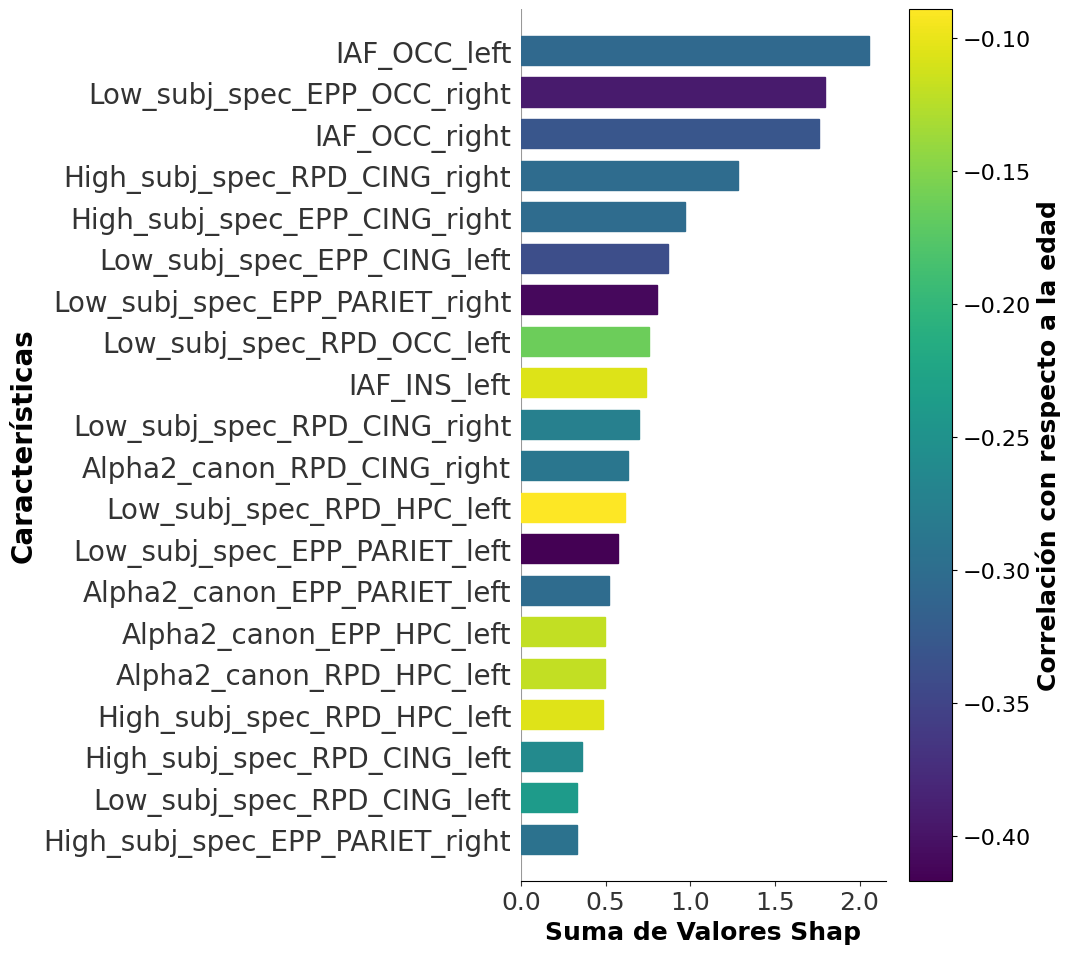

In [14]:
cat_model.plot_feature_importance(shap_values=shap_values,X_test=cat_model.X_test,y_test=cat_model.y_test)

In [25]:
with open(f'{path}Opt_Model/shap_values_cat.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model/shap_summary_sorted_cat.pickle', 'wb') as file:
        pickle.dump(shap_sumary_sorted, file)

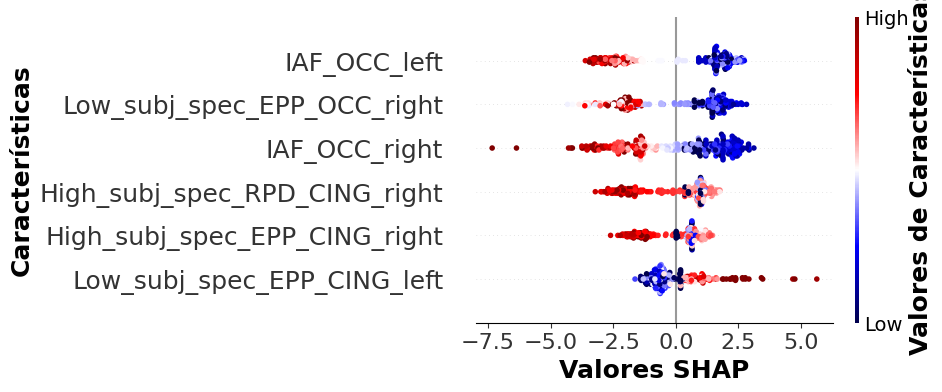

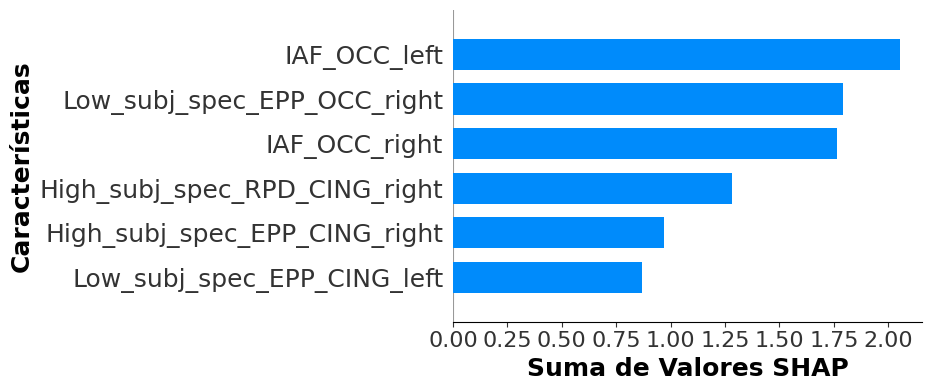

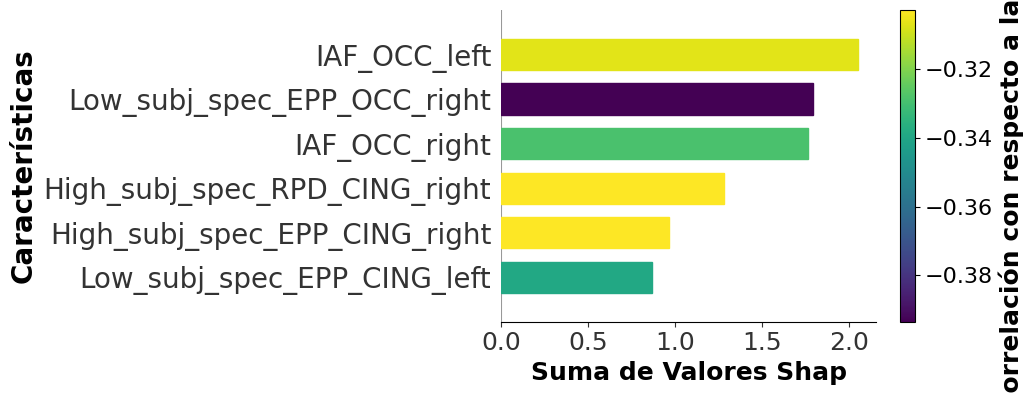

In [15]:
cat_model.plot_feature_importance(shap_values=shap_values,X_test=cat_model.X_test,y_test=cat_model.y_test,max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_xgb.pickle', 'rb') as file:
    shap_summary_sorted_cat = pickle.load(file)


In [29]:
shap_por_region_sorted, resultado_normalizado_sorted=cat_model.shap_region(shap_summary_sorted=shap_sumary_sorted, num_max=20)

CING_right: 1.000000
OCC_right: 0.991866
OCC_left: 0.783066
HPC_left: 0.583639
CING_left: 0.435018
PARIET_right: 0.315469
PARIET_left: 0.304701
INS_left: 0.205681


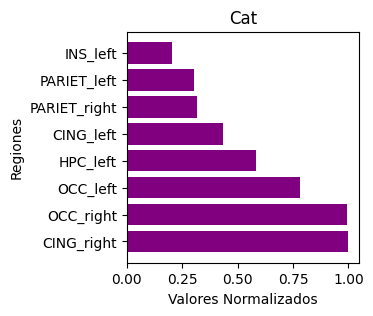

In [30]:
cat_model.plot_normalized_values(resultado_normalizado_sorted, color='purple', name_set='Cat',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


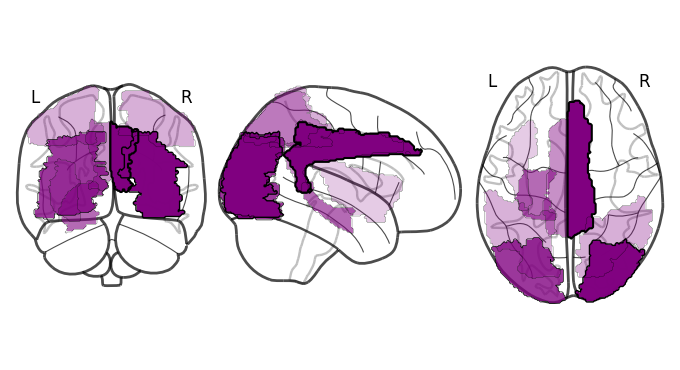

In [31]:
base_path = f'{path}cerebritos/'

cat_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='purple')